<a href="https://colab.research.google.com/github/nandandutta/Data_Science/blob/master/STAT4609_HW3_Neural_Network_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification. 
In this section, we are going to compare MLP, and, a simple CNN model, and ResNet-18. 
## Task 0: Reading 

## Part 1: Short Essay Around 500 words. 
1. introduce the computation of one CNN layer. please use proper notation to define the necessary parameters and illustrate the calculation process rigorously. 
2. Discuss the advantages of CNN compared with general Perceptron. 
3. Discuss the design and advantages of ResNet. 

1. introduce the computation of one CNN layer. please use proper notation to define the necessary parameters and illustrate the calculation process rigorously.

The main task of the convolutional layer is to detect local conjunctions of features from the previous layer and mapping their appearance to a feature map. As a result of convolution in neuronal networks, the image is split into perceptrons, creating local receptive fields and finally compressing the perceptrons in feature maps of size m2 × m3. Thus, this map stores the information where the feature occurs in the image and how well it corresponds to the filter. Hence, each filter is trained spatial in regard to the position in the volume it is applied to.

In each layer, there is a bank of  m1 filters. The number of how many filters are applied in one stage is equivalent to the depth of the volume of output feature maps. Each filter detects a particular feature at every location on the input. The output Y(l)i  of layer l consists of m(l)1 feature maps of size m(l)2 × m(l)3. The ith feature map, denoted Y(l)i, is computed as

(1)	Y(l)i=B(l)i+∑j=1m(l−1)1K(l)i,j∗Y(l−1)j
where B(l)i is a bias matrix and  K(l)i,j is the filter of size 2h(l)1+1 × 2h(l)2+1 connecting the jth feature map in layer (l−1) with ith feature map in layer.

The result of staging these convolutional layers in conjunction with the following layers is that the information of the image is classified like in vision. That means that the pixels are assembled into edglets, edglets into motifs, motifs into parts, parts into objects, and objects into scenes.

2. Discuss the advantages of CNN compared with general Perceptron.

Convolutional Neural Networks (CNN) are everywhere. It is arguably the most popular deep learning architecture. The recent surge of interest in deep learning is due to the immense popularity and effectiveness of convnets. The interest in CNN started with AlexNet in 2012 and it has grown exponentially ever since. In just three years, researchers progressed from 8 layer AlexNet to 152 layer ResNet.

CNN is now the go-to model on every image related problem. In terms of accuracy they blow competition out of the water. It is also successfully applied to recommender systems, natural language processing and more. The main advantage of CNN compared to its predecessors is that it automatically detects the important features without any human supervision. For example, given many pictures of cats and dogs it learns distinctive features for each class by itself.
CNN is also computationally efficient. It uses special convolution and pooling operations and performs parameter sharing. This enables CNN models to run on any device, making them universally attractive.

A multilayer perceptron (MLP) is a class of feedforward artificial neural network. A MLP consists of at least three layers of nodes: an input layer, a hidden layer and an output layer. Except for the input nodes, each node is a neuron that uses a nonlinear activation function. MLP utilizes a supervised learning technique called backpropagation for training. Its multiple layers and non-linear activation distinguish MLP from a linear perceptron. It can distinguish data that is not linearly separable.


3. Discuss the design and advantages of ResNet.

The module basically acts as multiple convolution filters, that are applied to the same input, with some pooling. The results are then concatenated. This allows the model to take advantage of multi-level feature extraction . For instance, it extracts general (5x5) and local (1x1) features at the same time.
Using multiple features from multiple filters improve the performance of the network. Other than that, there is another fact that makes the inception architecture better than others. All the architectures prior to inception, performed convolution on the spatial and channel wise domain together. By performing the 1x1 convolution, the inception block is doing cross-channel correlations, ignoring the spatial dimensions. This is followed by cross-spatial and cross-channel correlations via the 3x3 and 5x5 filters.
The Inception Module is based on a pattern recognition network which mimics the animal visual cortex. After presenting several examples of images, the network gets used to small details, middle sized features or almost whole images if they come up very often. Each layer of the deep network reinforces some features it thinks is there and passes on to the next. If it has been trained to recognize faces, the first layer detects edges, the second overall design, the third eyes, mouth, nose, the fourth the face, the fifth the mood, for instance.

According to the universal approximation theorem, given enough capacity, we know that a feedforward network with a single layer is sufficient to represent any function. However, the layer might be massive and the network is prone to overfitting the data. Therefore, there is a common trend in the research community that our network architecture needs to go deeper.
However, increasing network depth does not work by simply stacking layers together. Deep networks are hard to train because of the notorious vanishing gradient problem — as the gradient is back-propagated to earlier layers, repeated multiplication may make the gradient infinitively small. As a result, as the network goes deeper, its performance gets saturated or even starts degrading rapidly.
Before ResNet, there had been several ways to deal the vanishing gradient issue, e.g. adding an auxiliary loss in a middle layer as extra supervision, but none seemed to really tackle the problem once and for all.
The core idea of ResNet is introducing a so-called “identity shortcut connection” that skips one or more layers,
The authors of Resnet argue that stacking layers shouldn’t degrade the network performance, because we could simply stack identity mappings (layer that doesn’t do anything) upon the current network, and the resulting architecture would perform the same. This indicates that the deeper model should not produce a training error higher than its shallower counterparts. They hypothesize that letting the stacked layers fit a residual mapping is easier than letting them directly fit the desired underlaying mapping. And the residual block explicitly allows it to do precisely that.

Advantages of the ResNet:
1) To accelerate the speed of training of the deep networks
2) Instead of widen the network, increasing depth of the network results in less extra parameters
3) Reducing the effect of Vanishing Gradient Problem
4) Obtaining higher accuracy in network performance especially in Image Classification

In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import torch
import os
import pandas as pd
import numpy as np
import time
import random
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Training settings
batch_size = 64
test_batch_size = 1000
epochs = 14
lr = 1.0
gamma = 0.7
seed = 1
log_interval = 10
save_model = True
use_cuda = torch.cuda.is_available()
torch.manual_seed(seed)
device = torch.device("cuda" if use_cuda else "cpu")

## Part 2: Load and Normalize [KMNIST](https://github.com/rois-codh/kmnist)
![image](https://raw.githubusercontent.com/rois-codh/kmnist/master/images/kmnist_examples.png)
Now we'll also need DataLoaders for the dataset. This is where TorchVision comes into play. It let's use load the KMNIST dataset in a handy way. We'll use a batch_size of 64 for training and size 10000 for testing on this dataset. The values 0.1307 and 0.3081 used for the Normalize() transformation below are the global mean and standard deviation of the MNIST dataset, we'll take them as a given here.

TorchVision offers a lot of handy transformations, such as cropping or normalization.


In [4]:
import torch
import torchvision
import torchvision.transforms as transforms



transform = transforms.Compose([transforms.ToTensor(), 
                               transforms.Normalize((0.5,), (0.5,))])
# train  set
train_val = torchvision.datasets.KMNIST('./', train=True, download=True, transform=transform)

train, val = torch.utils.data.random_split(train_val, [50000, 10000])
train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val, batch_size=batch_size, shuffle=True)


# test set
test = torchvision.datasets.KMNIST('./', train=False, download=True,
                             transform=transform)
test_loader = torch.utils.data.DataLoader(test, batch_size=test_batch_size, shuffle=True)


Extracting ./KMNIST/raw/train-images-idx3-ubyte.gz to ./KMNIST/raw



Extracting ./KMNIST/raw/train-labels-idx1-ubyte.gz to ./KMNIST/raw



Extracting ./KMNIST/raw/t10k-images-idx3-ubyte.gz to ./KMNIST/raw



Extracting ./KMNIST/raw/t10k-labels-idx1-ubyte.gz to ./KMNIST/raw
Processing...


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:479: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


Let us show some of the training images, for fun.



In [5]:
def show_batch(batch):
    im = torchvision.utils.make_grid(batch)
    plt.imshow(np.transpose(im.numpy(), (1, 2, 0)))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Labels:  tensor([0, 3, 5, 7, 3, 7, 8, 7, 5, 3, 1, 6, 1, 8, 2, 0, 3, 4, 3, 3, 7, 7, 3, 4,
        4, 1, 8, 8, 3, 7, 5, 2, 9, 0, 2, 4, 0, 3, 2, 6, 6, 4, 0, 2, 0, 7, 3, 9,
        2, 3, 9, 9, 5, 4, 6, 0, 6, 7, 7, 9, 2, 6, 2, 5])
Batch shape:  torch.Size([64, 1, 28, 28])


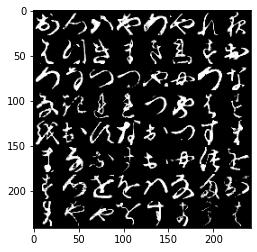

In [6]:
dataiter = iter(train_loader)
images, labels = dataiter.next()

print('Labels: ', labels)
print('Batch shape: ', images.size())
show_batch(images)

### MLP model 

#### Please define your MLP model in the following code block. This is written by your lovely tutors, you can directly use it



In [7]:
class MLP(torch.nn.Module):

    def __init__(self, num_features, num_hidden_1, num_classes):
        super(MLP, self).__init__()
        
        self.num_classes = num_classes
        
        ### ADD ADDITIONAL LAYERS BELOW IF YOU LIKE
        self.linear_1 = torch.nn.Linear(num_features, num_hidden_1)
        self.linear_out = torch.nn.Linear(num_hidden_1, num_classes)
        
    def forward(self, x):
        
        ### MAKE SURE YOU CONNECT THE LAYERS PROPERLY IF YOU CHANGED
        ### ANYTHNG IN THE __init__ METHOD ABOVE       
        out = self.linear_1(x)
        out = torch.sigmoid(out)
        logits = self.linear_out(out)
        probas = F.sigmoid(logits)
        return logits, probas


#################################
### Model Initialization
#################################


# the random seed makes sure that the random weight initialization
# in the model is always the same.
# In practice, some weights don't work well, and we may also want
# to try different random seeds. In this homework, this is not
# necessary.
RANDOM_SEED = random.seed(1000)
random.seed(RANDOM_SEED)
torch.manual_seed(1000)

### IF YOU CHANGED THE ARCHITECTURE ABOVE, MAKE SURE YOU 
### ACCOUNT FOR IT VIA THE PARAMETERS BELOW. I.e., if you
### added a second hidden layer, you may want to add a
### hidden_2 parameter here. Also you may want to play
### with the number of hidden units.
model = MLP(num_features=28*28,
            num_hidden_1=1000,
            num_classes=10)

model = model.to(device)

In [8]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.075)
NUM_EPOCHS = 15

In [9]:
# Optimizer 
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

optimizer = optim.Adadelta(model.parameters(), lr=lr)
scheduler = StepLR(optimizer, step_size=1, gamma=gamma)

#### Please define a function for the training loop of one epoch here 

As found above, data shape is (BACTH_SIZE, N_CHANNELS, WIDTH, HEIGHT). To feed our MLP network, we need to flatten the three last dimensions. We can do so with [Tensor.view()](http://pytorch.org/docs/master/tensors.html#torch.Tensor.view)
```
images.view(BATCH_SIZE, -1).size()
```

Please add code to the blocks. 

In [10]:
def compute_accuracy_and_loss(model, data_loader, device):
    correct_pred, num_examples = 0, 0
    cross_entropy = 0.
    for i, (features, targets) in enumerate(data_loader):
            
        features = features.view(-1, 28*28).to(device)
        targets = targets.to(device)

        logits, probas = model(features)
        cross_entropy += F.cross_entropy(logits, targets).item()
        _, predicted_labels = torch.max(probas, 1)
        num_examples += targets.size(0)
        correct_pred += (predicted_labels == targets).sum()
    return correct_pred.float()/num_examples * 100, cross_entropy/num_examples
    

start_time = time.time()
train_acc_lst, valid_acc_lst = [], []
train_loss_lst, valid_loss_lst = [], []

for epoch in range(NUM_EPOCHS):
    
    model.train()
    
    for batch_idx, (features, targets) in enumerate(train_loader):
    
        ### PREPARE MINIBATCH
        features = features.view(-1, 28*28).to(device)
        targets = targets.to(device)
            
        ### FORWARD AND BACK PROP
        logits, probas = model(features)
        cost = F.cross_entropy(logits, targets)
        optimizer.zero_grad()
        
        cost.backward()
        
        ### UPDATE MODEL PARAMETERS
        optimizer.step()
        
        ### LOGGING
        if not batch_idx % 20:
            print (f'Epoch: {epoch+1:03d}/{NUM_EPOCHS:03d} | '
                   f'Batch {batch_idx:03d}/{len(train_loader):03d} |' 
                   f' Cost: {cost:.4f}')

    # no need to build the computation graph for backprop when computing accuracy
    model.eval()
    with torch.set_grad_enabled(False):
        train_acc, train_loss = compute_accuracy_and_loss(model, train_loader, device=device)
        valid_acc, valid_loss = compute_accuracy_and_loss(model, test_loader, device=device)
        train_acc_lst.append(train_acc)
        valid_acc_lst.append(valid_acc)
        train_loss_lst.append(train_loss)
        valid_loss_lst.append(valid_loss)
        print(f'Epoch: {epoch+1:03d}/{NUM_EPOCHS:03d} Train Acc.: {train_acc:.2f}%'
              f' | Validation Acc.: {valid_acc:.2f}%')
        
    elapsed = (time.time() - start_time)/60
    print(f'Time elapsed: {elapsed:.2f} min')
  
elapsed = (time.time() - start_time)/60
print(f'Total Training Time: {elapsed:.2f} min')

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch: 001/015 | Batch 000/782 | Cost: 2.3436
Epoch: 001/015 | Batch 020/782 | Cost: 1.4033
Epoch: 001/015 | Batch 040/782 | Cost: 1.0991
Epoch: 001/015 | Batch 060/782 | Cost: 1.3162
Epoch: 001/015 | Batch 080/782 | Cost: 1.1022
Epoch: 001/015 | Batch 100/782 | Cost: 0.9775
Epoch: 001/015 | Batch 120/782 | Cost: 0.9091
Epoch: 001/015 | Batch 140/782 | Cost: 0.7052
Epoch: 001/015 | Batch 160/782 | Cost: 1.1038
Epoch: 001/015 | Batch 180/782 | Cost: 0.9598
Epoch: 001/015 | Batch 200/782 | Cost: 0.6563
Epoch: 001/015 | Batch 220/782 | Cost: 0.8294
Epoch: 001/015 | Batch 240/782 | Cost: 0.5324
Epoch: 001/015 | Batch 260/782 | Cost: 0.5098
Epoch: 001/015 | Batch 280/782 | Cost: 0.5759
Epoch: 001/015 | Batch 300/782 | Cost: 0.4505
Epoch: 001/015 | Batch 320/782 | Cost: 0.8045
Epoch: 001/015 | Batch 340/782 | Cost: 0.4378
Epoch: 001/015 | Batch 360/782 | Cost: 0.9423
Epoch: 001/015 | Batch 380/782 | Cost: 0.7569
Epoch: 001/015 | Batch 400/782 | Cost: 0.6095
Epoch: 001/015 | Batch 420/782 | C

#### Please define a function for the testing on validation/test set, which returns the averaged loss on testing set and accuracy. 

In [11]:
def compute_accuracy(net, data_loader):
    correct_pred, num_examples = 0, 0
    with torch.no_grad():
        for features, targets in data_loader:
            features = features.view(-1, 28*28)
            _,outputs = net.forward(features)
            predicted_labels = torch.argmax(outputs, 1)
            num_examples += targets.size(0)
            correct_pred += (predicted_labels == targets).sum()
        return correct_pred.float()/num_examples * 100
    
print('Training Accuracy: %.2f' % compute_accuracy(model, train_loader))
print('Test Accuracy: %.2f' % compute_accuracy(model, test_loader))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Training Accuracy: 99.95
Test Accuracy: 90.54


#### Visualize training progress

You are strongly recommended to check out [tensorboard for pytorch](https://pytorch.org/docs/stable/tensorboard.html), a huge life saver. 

but here for the assignment, you just need to visualize the training process by visualize the following components
1.  training loss with respect to epochs like we did before. 
2. plot validation accuracy with repect to epochs 

Please include this two scatter plots in one figure with a clear legend.

In [12]:

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

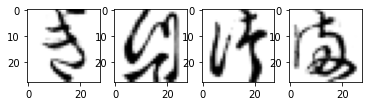

In [13]:

for features, targets in test_loader:
    break
    
fig, ax = plt.subplots(1, 4)
for i in range(4):
    ax[i].imshow(features[i].view(28, 28), cmap=matplotlib.cm.binary)

plt.show()

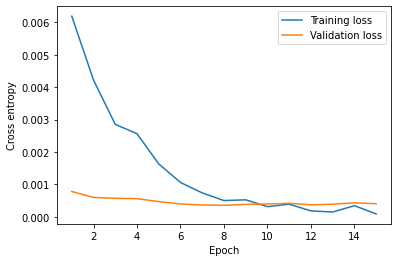

In [14]:
plt.plot(range(1, NUM_EPOCHS+1), train_loss_lst, label='Training loss')
plt.plot(range(1, NUM_EPOCHS+1), valid_loss_lst, label='Validation loss')
plt.legend(loc='upper right')
plt.ylabel('Cross entropy')
plt.xlabel('Epoch')
plt.show()

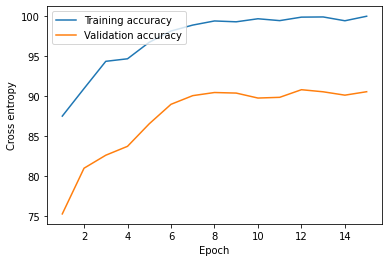

In [15]:

plt.plot(range(1, NUM_EPOCHS+1), train_acc_lst, label='Training accuracy')
plt.plot(range(1, NUM_EPOCHS+1), valid_acc_lst, label='Validation accuracy')
plt.legend(loc='upper left')
plt.ylabel('Cross entropy')
plt.xlabel('Epoch')
plt.show()

#### Now how will you averaged accuracy on test set?

In [16]:
model.eval()
with torch.set_grad_enabled(False): # save memory during inference
    test_acc, test_loss = compute_accuracy_and_loss(model, test_loader,device)
    print(f'Test accuracy: {test_acc:.2f}%')

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Test accuracy: 90.54%


#### Now how will you get the class-wise accuracy on test set?

### Use a simple CNN model :) 
The model structure is 

#### Complete training and testing similar to the MLP model
1. Configure your CNN model, optimizer, and scheduler. 
2. modify training and testing function 
3. train the model and test the validation performance each epoch. 
4. Visualize training process, by training loss and validation accuracy.
5. Report averaged loss and accuracy on test set
6. Report the class-wise accuracy on test set. 

In [35]:
import os
import time

import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader

from torchvision import datasets
from torchvision import transforms

import matplotlib.pyplot as plt
from PIL import Image


if torch.cuda.is_available():
    torch.backends.cudnn.deterministic = True

In [36]:

##########################
### SETTINGS
##########################

# Hyperparameters
RANDOM_SEED = 1
LEARNING_RATE = 0.001
BATCH_SIZE = 128
NUM_EPOCHS = 10

# Architecture
NUM_FEATURES = 32*32
NUM_CLASSES = 10

# Other
if torch.cuda.is_available():
    DEVICE = "cuda:0"
else:
    DEVICE = "cpu"
    
GRAYSCALE = True

In [ ]:
##########################
### MNIST DATASET
##########################

resize_transform = transforms.Compose([transforms.Resize((32, 32)),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.5,), (0.5,))])

# Note transforms.ToTensor() scales input images
# to 0-1 range
train_dataset = datasets.MNIST(root='data', 
                               train=True, 
                               transform=resize_transform,
                               download=True)

test_dataset = datasets.MNIST(root='data', 
                              train=False, 
                              transform=resize_transform)


train_loader = DataLoader(dataset=train_dataset, 
                          batch_size=BATCH_SIZE, 
                          shuffle=True)

test_loader = DataLoader(dataset=test_dataset, 
                         batch_size=BATCH_SIZE, 
                         shuffle=False)

In [ ]:
# Checking the dataset
for images, labels in train_loader:  
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    break

In [22]:
device = torch.device(DEVICE)
torch.manual_seed(0)

for epoch in range(2):

    for batch_idx, (x, y) in enumerate(train_loader):
        
        print('Epoch:', epoch+1, end='')
        print(' | Batch index:', batch_idx, end='')
        print(' | Batch size:', y.size()[0])
        
        x = x.to(device)
        y = y.to(device)
        break

TypeError: ignored

In [ ]:
:
##########################
### MODEL
##########################

class LeNet5(nn.Module):

    def __init__(self, num_classes, grayscale=False):
        super(LeNet5, self).__init__()
        
        self.grayscale = grayscale
        self.num_classes = num_classes

        if self.grayscale:
            in_channels = 1
        else:
            in_channels = 3

        self.features = nn.Sequential(
            
            nn.Conv2d(in_channels, 6, kernel_size=5),
            nn.Tanh(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(6, 16, kernel_size=5),
            nn.Tanh(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.classifier = nn.Sequential(
            nn.Linear(16*5*5, 120),
            nn.Tanh(),
            nn.Linear(120, 84),
            nn.Tanh(),
            nn.Linear(84, num_classes),
        )


    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        logits = self.classifier(x)
        probas = F.softmax(logits, dim=1)
        return logits, probas

In [ ]:
torch.manual_seed(RANDOM_SEED)

model = LeNet5(NUM_CLASSES, GRAYSCALE)
model.to(DEVICE)

optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [ ]:
########Training##########
def compute_accuracy(model, data_loader, device):
    correct_pred, num_examples = 0, 0
    for i, (features, targets) in enumerate(data_loader):
            
        features = features.to(device)
        targets = targets.to(device)

        logits, probas = model(features)
        _, predicted_labels = torch.max(probas, 1)
        num_examples += targets.size(0)
        correct_pred += (predicted_labels == targets).sum()
    return correct_pred.float()/num_examples * 100
    

start_time = time.time()
for epoch in range(NUM_EPOCHS):
    
    model.train()
    for batch_idx, (features, targets) in enumerate(train_loader):
        
        features = features.to(DEVICE)
        targets = targets.to(DEVICE)
            
        ### FORWARD AND BACK PROP
        logits, probas = model(features)
        cost = F.cross_entropy(logits, targets)
        optimizer.zero_grad()
        
        cost.backward()
        
        ### UPDATE MODEL PARAMETERS
        optimizer.step()
        
        ### LOGGING
        if not batch_idx % 50:
            print ('Epoch: %03d/%03d | Batch %04d/%04d | Cost: %.4f' 
                   %(epoch+1, NUM_EPOCHS, batch_idx, 
                     len(train_loader), cost))

        

    model.eval()
    with torch.set_grad_enabled(False): # save memory during inference
        print('Epoch: %03d/%03d | Train: %.3f%%' % (
              epoch+1, NUM_EPOCHS, 
              compute_accuracy(model, train_loader, device=DEVICE)))
        
    print('Time elapsed: %.2f min' % ((time.time() - start_time)/60))
    
print('Total Training Time: %.2f min' % ((time.time() - start_time)/60))

### Use ResNet from torchvision
If you’re new to PyTorch, then you should know that there is an official PyTorch library dedicated for computer vision problems - Torchvision. It provides stable and well tested implementation of various network architectures, including: ResNets in many variants (ResNet-18, ResNet-34, ResNet-51 and so on), ShuffleNets, MobileNets as well as many other ResNet-related ones, that improve the original architecture e.g. ResNeXt.

Torchvision also weights for those networks that are trained on ImageNet dataset and are ready to use for transfer learning. In this tutorial, we will be training ResNet-18 from scratch, as digit images from MNIST dataset are really different from the images included in the ImageNet.

In [ ]:
from torchvision.models import resnet18
from torch import nn
model = resnet18(num_classes=10) # MNIST has 10 classe
model

In order to adapt this architecture for MNIST there is one more thing required - input layer needs to accept single channel instead of 3 (MNIST images are single-channel = grayscale, whereas ImageNet are 3-channels = RGB).



In [ ]:
model.conv1 = ...


#### Complete training and testing similar to the MLP model
1. Configure your CNN model, optimizer, and scheduler. 
2. modify training and testing function 
3. train the model and test the validation performance each epoch. 
4. Visualize training process, by training loss and validation accuracy.
5. Report averaged loss and accuracy on test set
6. Report the class-wise accuracy on test set. 

## Part 3: 
Briefly analyze the performance of 3 models above. 